In [1]:

import pandas as pd

DATA_PATH = "/home/hassan/Desktop/project/simplon/HR-Pulse/ml/data/jobs_data.csv"

if DATA_PATH:
  df = pd.read_csv(DATA_PATH)
else:
  print(f"File not fount at: {DATA_PATH.resolve()}")


### Dataset exploration 

In [2]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [3]:
len(df)

672

In [4]:
df.describe()

,index,Rating,Founded
count,672.000000,672.000000,672.000000
mean,335.500000,3.518601,1635.529762
std,194.133974,1.410329,756.746640
min,0.000000,-1.000000,-1.000000
25%,167.750000,3.300000,1917.750000
50%,335.500000,3.800000,1995.000000
75%,503.250000,4.300000,2009.000000
max,671.000000,5.000000,2019.000000


In [5]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='str')

In [6]:
df.isnull().sum()

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [39]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'salary_avg', 'size_numeric',
       'ownership_grouped', 'Sector_cleaned', 'job_simp', 'revenue_ordinal'],
      dtype='str')

### Columns Analysis

#### Salary Estimate

In [7]:
df["Salary Estimate"]

0      $137K-$171K (Glassdoor est.)
1      $137K-$171K (Glassdoor est.)
2      $137K-$171K (Glassdoor est.)
3      $137K-$171K (Glassdoor est.)
4      $137K-$171K (Glassdoor est.)
                   ...             
667    $105K-$167K (Glassdoor est.)
668    $105K-$167K (Glassdoor est.)
669    $105K-$167K (Glassdoor est.)
670    $105K-$167K (Glassdoor est.)
671    $105K-$167K (Glassdoor est.)
Name: Salary Estimate, Length: 672, dtype: str

In [8]:
def clean_salary(df,  column_name="Salary Estimate"):
  salary = df[column_name].str.split("(").str[0]
  salary = salary.str.replace("K", "000").str.replace("$",'')

  df["min_salary"] = salary.str.split("-").str[0].astype(float)
  df["max_salary"] = salary.str.split("-").str[1].astype(float)

  df["salary_avg"] = (df["max_salary"] + df["min_salary"]) / 2

  return df.dropna(subset=['salary_avg'])

In [9]:
df = clean_salary(df)
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,salary_avg
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137000.0,171000.0,154000.0
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137000.0,171000.0,154000.0
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137000.0,171000.0,154000.0
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000.0,171000.0,154000.0
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137000.0,171000.0,154000.0


In [10]:
df["salary_avg"].describe()

count       672.000000
mean     123663.690476
std       39580.267895
min       43500.000000
25%      103000.000000
50%      114000.000000
75%      136500.000000
max      271500.000000
Name: salary_avg, dtype: float64

#### Job Title

In [ ]:
df['Job Title'].unique()

<StringArray>
[                                                 'Sr Data Scientist',
                                                     'Data Scientist',
                           'Data Scientist / Machine Learning Expert',
                                   'Staff Data Scientist - Analytics',
                          'Data Scientist - Statistics, Early Career',
                                                       'Data Modeler',
                                         'Experienced Data Scientist',
                                          'Data Scientist - Contract',
                                                    'Data Analyst II',
                                              'Medical Lab Scientist',
 ...
 'Information Systems Engineering Specialist (Engineering Scientist)',
                 'Scientist/Research Associate-Metabolic Engineering',
            'Vice President, Biometrics and Clinical Data Management',
   'Enterprise Data Analyst (Enterprise Portfolio Manageme

In [ ]:
df['Job Title'].value_counts()

Job Title
Data Scientist                                                      337
Data Engineer                                                        26
Senior Data Scientist                                                19
Machine Learning Engineer                                            16
Data Analyst                                                         12
                                                                   ... 
Sr. Research Associate/ Scientist, NGS prep & Molecular Genomics      1
Developer III - Data Science                                          1
Hydrogen/Tritium Materials Scientist (Experienced)                    1
Data Scientist/Data Analytics Practitioner                            1
AI/ML - Machine Learning Scientist, Siri Understanding                1
Name: count, Length: 172, dtype: int64

In [ ]:
def title_simplifier(title):
    title = title.lower()
    if 'data scientist' in title:
        return 'data scientist'
    elif 'data engineer' in title:
        return 'data engineer'
    elif 'analyst' in title:
        return 'data analyst'
    elif 'machine learning' in title:
        return 'mle'
    elif 'manager' in title:
        return 'manager'
    elif 'director' in title:
        return 'director'
    else:
        return 'na'

df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [ ]:
df['job_simp'].value_counts()

job_simp
data scientist    455
na                 69
data analyst       55
data engineer      47
mle                36
manager             7
director            3
Name: count, dtype: int64

#### Job Description

In [ ]:
df['Job Description'][0]

"Description\n\nThe Senior Data Scientist is responsible for defining, building, and improving statistical models to improve business processes and outcomes in one or more healthcare domains such as Clinical, Enrollment, Claims, and Finance. As part of the broader analytics team, Data Scientist will gather and analyze data to solve and address complex business problems and evaluate scenarios to make predictions on future outcomes and work with the business to communicate and support decision-making. This position requires strong analytical skills and experience in analytic methods including multivariate regressions, hierarchical linear models, regression trees, clustering methods and other complex statistical techniques.\n\nDuties & Responsibilities:\n\n• Develops advanced statistical models to predict, quantify or forecast various operational and performance metrics in multiple healthcare domains\n• Investigates, recommends, and initiates acquisition of new data resources from interna

#### Rating

In [ ]:
df['Rating'] = df['Rating'].replace(-1, np.nan)
rating_median = df['Rating'].median()
df['Rating'] = df['Rating'].fillna(rating_median)

#### Revenue

In [ ]:
df['Revenue'].unique()

<StringArray>
[        'Unknown / Non-Applicable',           '$1 to $2 billion (USD)',
       '$100 to $500 million (USD)',               '$10+ billion (USD)',
           '$2 to $5 billion (USD)', '$500 million to $1 billion (USD)',
          '$5 to $10 billion (USD)',         '$10 to $25 million (USD)',
         '$25 to $50 million (USD)',        '$50 to $100 million (USD)',
           '$1 to $5 million (USD)',          '$5 to $10 million (USD)',
       'Less than $1 million (USD)',                               '-1']
Length: 14, dtype: str

In [ ]:
revenue_map = {
    'Unknown / Non-Applicable': 0,
    '-1': 0,
    'Less than $1 million (USD)': 1,
    '$1 to $5 million (USD)': 2,
    '$5 to $10 million (USD)': 3,
    '$10 to $25 million (USD)': 4,
    '$25 to $50 million (USD)': 5,
    '$50 to $100 million (USD)': 6,
    '$100 to $500 million (USD)': 7,
    '$500 million to $1 billion (USD)': 8,
    '$1 to $2 billion (USD)': 9,
    '$2 to $5 billion (USD)': 10,
    '$5 to $10 billion (USD)': 11,
    '$10+ billion (USD)': 12
}

df['revenue_ordinal'] = df['Revenue'].map(revenue_map)

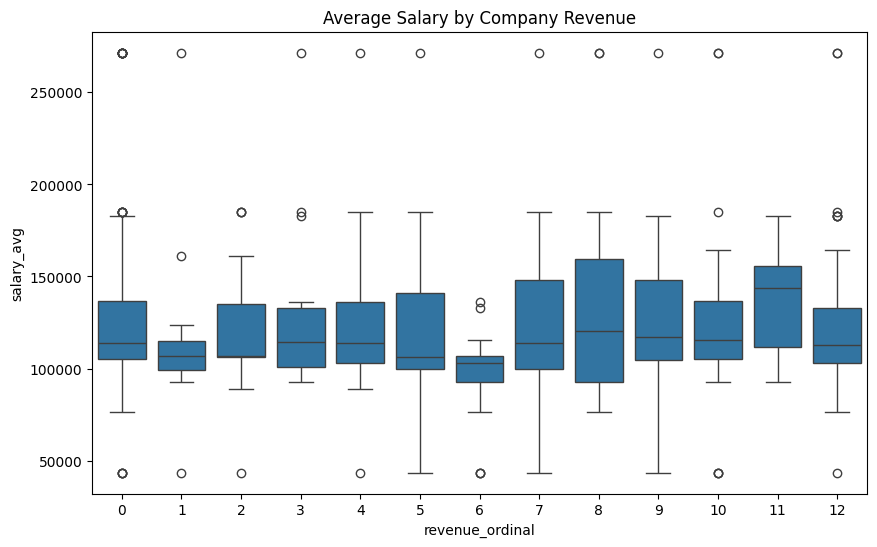

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='revenue_ordinal', y='salary_avg', data=df)
plt.title('Average Salary by Company Revenue')
plt.show()

In [ ]:
Q1 = df['salary_avg'].quantile(0.25)
Q3 = df['salary_avg'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df_cleaned = df[(df['salary_avg'] >= lower_limit) & (df['salary_avg'] <= upper_limit)]

print(f"Deleted columns : {len(df) - len(df_cleaned)}")

Deleted columns : 41


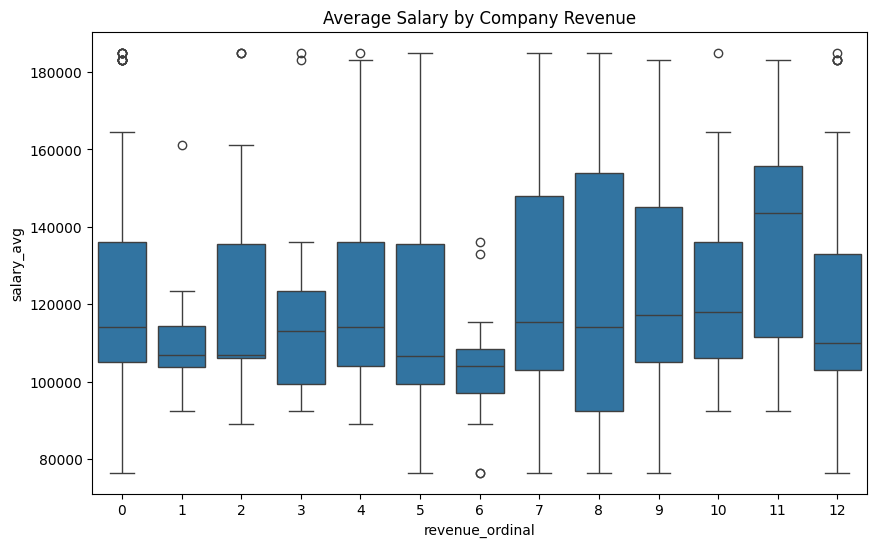

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='revenue_ordinal', y='salary_avg', data=df_cleaned)
plt.title('Average Salary by Company Revenue')
plt.show()

In [ ]:
df_cleaned.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Revenue,Competitors,min_salary,max_salary,salary_avg,size_numeric,ownership_grouped,Sector_cleaned,job_simp,revenue_ordinal
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,NY,"New York, NY",1001 to 5000 employees,1993,...,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137000.0,171000.0,154000.0,4.0,Nonprofit_Edu,Insurance,data scientist,0
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,VA,"Herndon, VA",5001 to 10000 employees,1968,...,$1 to $2 billion (USD),-1,137000.0,171000.0,154000.0,5.0,Public_Co,Business Services,data scientist,9
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,MA,"Boston, MA",1001 to 5000 employees,1981,...,$100 to $500 million (USD),-1,137000.0,171000.0,154000.0,4.0,Private_Co,Business Services,data scientist,7
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,MA,"Bad Ragaz, Switzerland",501 to 1000 employees,2000,...,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000.0,171000.0,154000.0,3.0,Public_Co,Manufacturing,data scientist,7
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,"New York, NY",51 to 200 employees,1998,...,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137000.0,171000.0,154000.0,1.0,Private_Co,Business Services,data scientist,0


#### Company Name

In [12]:
df['Company Name'] = df['Company Name'].apply(lambda x: str(x).split('\n')[0])
df['Company Name']

0               Healthfirst
1                   ManTech
2            Analysis Group
3                   INFICON
4        Affinity Solutions
               ...         
667                TRANZACT
668                    JKGT
669              AccessHope
670    ChaTeck Incorporated
671           1-800-Flowers
Name: Company Name, Length: 672, dtype: str

#### Location

In [13]:
df['Location'] = df['Location'].apply(lambda x: x.split(',')[-1].strip() if ',' in str(x) else x)
df['Location']

0      NY
1      VA
2      MA
3      MA
4      NY
       ..
667    NJ
668    CA
669    CA
670    CA
671    NY
Name: Location, Length: 672, dtype: str

In [14]:
df['Location'].unique()

<StringArray>
[           'NY',            'VA',            'MA',            'CA',
            'IL',            'MO',            'WA',            'DC',
        'Remote',            'TN',            'TX',            'PA',
            'AZ',            'WI',            'GA',            'FL',
 'United States',            'NE',            'KS',            'NH',
            'NJ',            'LA',            'OH',            'IN',
            'MD',            'CO',          'Utah',    'New Jersey',
            'UT',            'OR',            'MI',            'SC',
            'MS',            'AL',            'RI',            'IA',
            'MN',            'OK',            'CT',            'NC',
         'Texas',            'DE',    'California',            'WV']
Length: 44, dtype: str

In [15]:
df['Location'].value_counts()

Location
CA               165
VA                89
MA                62
NY                52
MD                40
IL                30
DC                26
TX                17
WA                16
OH                14
MO                12
PA                12
United States     11
NJ                10
CO                10
GA                 9
NC                 9
TN                 8
FL                 8
Remote             6
WI                 6
OK                 6
IN                 5
MI                 5
AZ                 4
AL                 4
MN                 4
CT                 4
NE                 3
UT                 3
IA                 3
NH                 2
Utah               2
New Jersey         2
OR                 2
SC                 2
RI                 2
KS                 1
LA                 1
MS                 1
Texas              1
DE                 1
California         1
WV                 1
Name: count, dtype: int64

#### Size

In [16]:
df['Size'].unique()

<StringArray>
[ '1001 to 5000 employees', '5001 to 10000 employees',
   '501 to 1000 employees',     '51 to 200 employees',
        '10000+ employees',    '201 to 500 employees',
       '1 to 50 employees',                      '-1',
                 'Unknown']
Length: 9, dtype: str

In [17]:
import numpy as np

df["Size"] = df['Size'].replace(['-1', 'Unknown'], np.nan)

size_order = [
    '1 to 50 employees',
    '51 to 200 employees',
    '201 to 500 employees',
    '501 to 1000 employees',
    '1001 to 5000 employees',
    '5001 to 10000 employees',
    '10000+ employees'
]

size_map = {label: i for i, label in enumerate(size_order)}
df["size_numeric"] = df["Size"].map(size_map)
df["size_numeric"] = df["size_numeric"].fillna(df["size_numeric"].median())
df["size_numeric"]

0      4.0
1      5.0
2      4.0
3      3.0
4      1.0
      ... 
667    4.0
668    3.0
669    3.0
670    0.0
671    4.0
Name: size_numeric, Length: 672, dtype: float64

#### Type of ownership

In [18]:
df['Type of ownership'].unique()

<StringArray>
[        'Nonprofit Organization',               'Company - Public',
        'Private Practice / Firm',              'Company - Private',
                     'Government', 'Subsidiary or Business Segment',
             'Other Organization',                             '-1',
                        'Unknown',                       'Hospital',
                  'Self-employed',           'College / University',
                       'Contract']
Length: 13, dtype: str

In [19]:
def group_ownership(x):
    if x in ['Company - Public', 'Subsidiary or Business Segment']:
        return 'Public_Co'
    elif x in ['Company - Private', 'Private Practice / Firm']:
        return 'Private_Co'
    elif x in ['Nonprofit Organization', 'College / University', 'Hospital']:
        return 'Nonprofit_Edu'
    elif x == 'Government':
        return 'Government'
    elif x in ['Self-employed', 'Contract']:
        return 'Independent'
    else:
        return 'Other_Unknown'

df['ownership_grouped'] = df['Type of ownership'].apply(group_ownership)

In [20]:
df['ownership_grouped'].unique()

<StringArray>
['Nonprofit_Edu',     'Public_Co',    'Private_Co',    'Government',
 'Other_Unknown',   'Independent']
Length: 6, dtype: str

#### Sector

In [21]:
df["Sector"].unique()

<StringArray>
[                         'Insurance',                  'Business Services',
                      'Manufacturing',             'Information Technology',
          'Biotech & Pharmaceuticals',                             'Retail',
       'Oil, Gas, Energy & Utilities',                         'Government',
                        'Health Care',                            'Finance',
                'Aerospace & Defense',                                 '-1',
         'Transportation & Logistics',                              'Media',
                 'Telecommunications',                        'Real Estate',
                   'Travel & Tourism',             'Agriculture & Forestry',
                          'Education',                 'Accounting & Legal',
                         'Non-Profit', 'Construction, Repair & Maintenance',
                  'Consumer Services']
Length: 23, dtype: str

In [22]:
df['Sector'] = df['Sector'].replace('-1', 'Other')

In [23]:
df['Sector'].value_counts()

Sector
Information Technology                188
Business Services                     120
Other                                  71
Biotech & Pharmaceuticals              66
Aerospace & Defense                    46
Finance                                33
Insurance                              32
Manufacturing                          23
Health Care                            21
Government                             17
Oil, Gas, Energy & Utilities           10
Retail                                  7
Telecommunications                      7
Transportation & Logistics              6
Media                                   5
Real Estate                             3
Travel & Tourism                        3
Agriculture & Forestry                  3
Education                               3
Accounting & Legal                      3
Construction, Repair & Maintenance      2
Consumer Services                       2
Non-Profit                              1
Name: count, dtype: int64

In [24]:
counts = df['Sector'].value_counts()
sectors_to_keep = counts[counts >= 10].index

df['Sector_cleaned'] = df['Sector'].apply(lambda x: x if x in sectors_to_keep else 'Other')

In [25]:
df['Sector_cleaned'].value_counts()

Sector_cleaned
Information Technology          188
Business Services               120
Other                           116
Biotech & Pharmaceuticals        66
Aerospace & Defense              46
Finance                          33
Insurance                        32
Manufacturing                    23
Health Care                      21
Government                       17
Oil, Gas, Energy & Utilities     10
Name: count, dtype: int64

#### Competitors

In [27]:
df['Competitors'].value_counts()

Competitors
-1                                                             501
Roche, GlaxoSmithKline, Novartis                                10
Leidos, CACI International, Booz Allen Hamilton                  6
Los Alamos National Laboratory, Battelle, SRI International      6
Commerce Signals, Cardlytics, Yodlee                             3
                                                              ... 
United Natural Foods, US Foods, DPI Specialty Foods              1
LivePerson, Salesforce, SAP                                      1
Zurich Insurance, AXA XL, Allianz                                1
CSC, ManTech, SAIC                                               1
Genomic Health, Myriad Genetics, The Broad Institute             1
Name: count, Length: 108, dtype: int64